In [67]:
from utils import get_full_evidence_df

In [68]:
dfs, annotator_instance_repeats = get_full_evidence_df([
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_9-29-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-3-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-9-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-14-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-16-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-17-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-20-23/annotations',
    # '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-20-23_extra/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-21-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-30-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_12-11-23/annotations',
    # '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_12-14-23/annotations',
    ])

In [69]:
print(annotator_instance_repeats.keys())
# print(len(annotator_instance_repeats['val2']))
# annotator_instance_repeats['val2'][0]

dict_keys([])


In [70]:
# dfs['val2'][dfs['val2'].instance == "val2 Instance 69 (patient 11480, 158 reports)"]

In [71]:
assert len(annotator_instance_repeats) == 0

In [72]:
dfs['val2']['evidence_anns'].iloc[0]

{10: {'cancer': {'relevance': '1 - Weak Correlation', 'impact': 'Yes'},
  'pneumonia': {'relevance': '1 - Weak Correlation', 'impact': 'Yes'},
  'pulmonary edema': {'relevance': '1 - Weak Correlation', 'impact': 'Yes'},
  'evidence_was_seen': 'Yes',
  'notes': 'Only one piece of relevant evidence because huge gap in the medical record between recent report and past reports.',
  'evidence': {'score': '0.96',
   'evidence': "The liver is nodular and coarse in echotexture, consistent with patient's history of known cirrhosis. The gallbladder wall is thickened, with a dependent gallstone within it. A moderate amount of",
   'query': 'cancer (diagnosis)',
   'day': -387,
   'report_number': '20'},
  'sorted_idx': 0,
  'evidence_distribution': [2.884256362915039,
   -2.276189088821411,
   -1.170615315437317]}}

In [73]:
dfs['val2'].columns

Index(['index', 'obs', 'timestep', 'num_reports', 'instance',
       'time_for_initial_assesment', 'seen_targets', 'option_likelihood_anns',
       'max_timesteps', 'true_positives', 'current_targets',
       'target_countdown', 'is_valid_timestep', 'current_report',
       'start_report', 'future_true_positives', 'past_targets',
       'instance_index', 'model_type', 'sort_type', 'prediction_aligns',
       'evidence_anns', 'options', 'selected_options',
       'option_likelihood_anns2', 'concluding_notes', 'invalid_instance_notes',
       'annotator', 'date', 'action', 'visited_reports',
       'visited_report_timestamps'],
      dtype='object')

In [74]:
from utils import get_all_hallucination_annotations, get_args
def add_hallucination_annotations(dfs):
    new_dfs = {}
    for split, df in dfs.items():
        new_dfs[split] = df.copy()
        hallucination_anns = get_all_hallucination_annotations(
            get_args('config.yaml'), split)
        for i, row in hallucination_anns.iterrows():
            selected_rows = new_dfs[split][
                (new_dfs[split].instance == row['instance']) &
                (new_dfs[split].model_type == row['model_type']) &
                (new_dfs[split].sort_type == row['sort_type'])
            ]
            assert len(selected_rows) == 1
            evidence_anns = selected_rows.iloc[0].evidence_anns
            evidence_anns[row['evidence_idx']]['hallucination_ann'] = \
                row['hallucination_ann']
    return new_dfs
dfs = add_hallucination_annotations(dfs)

In [75]:
dfs['val2']

,index,obs,timestep,num_reports,instance,time_for_initial_assesment,seen_targets,option_likelihood_anns,max_timesteps,true_positives,...,options,selected_options,option_likelihood_anns2,concluding_notes,invalid_instance_notes,annotator,date,action,visited_reports,visited_report_timestamps
0,0,"{'options': 'option,type cancer,diagnosis pneu...",1,26,"val2 Instance 50 (patient 11755, 122 reports)",168.272657,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",19,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,9-29-23,NaN,NaN,NaN
1,1,"{'options': 'option,type cancer,diagnosis pneu...",1,42,"val2 Instance 51 (patient 7470, 53 reports)",189.534721,{pulmonary edema (diagnosis)},NaN,21,None,...,NaN,NaN,NaN,NaN,,Andrea,9-29-23,NaN,NaN,NaN
2,2,"{'options': 'option,type cancer,diagnosis pneu...",1,1,"val2 Instance 52 (patient 83375, 8 reports)",24.683878,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",7,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,9-29-23,NaN,NaN,NaN
3,3,"{'options': 'option,type cancer,diagnosis pneu...",1,2,"val2 Instance 53 (patient 94023, 4 reports)",29.90608,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",3,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,9-29-23,NaN,NaN,NaN
4,4,"{'options': 'option,type cancer,diagnosis pneu...",1,2,"val2 Instance 54 (patient 26310, 32 reports)",46.365206,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",3,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,9-29-23,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,5,"{'options': 'option,type cancer,diagnosis pneu...",1,34,"val2 Instance 95 (patient 79511, 75 reports)",205.561148,{},"{'cancer (diagnosis)': 'Very likely', 'pneumon...",25,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Very likely', 'pneumon...",,NaN,Geoff,11-30-23,"[-2.4526724815368652, -1.8406120538711548, -1....","[34. 109613.0 - General: ""Clinician: Attendin...","[0.001026153564453125, 88.60719799995422, 170...."
58,0,"{'options': 'option,type cancer,diagnosis pneu...",1,19,"val2 Instance 140 (patient 8134, 24 reports)",202.630398,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",9,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Geoff,12-11-23,"[-3.584925889968872, -0.8680037260055542, -2.5...","[19. 112290.0 - Nursing/other: ""NPN 1900-0700""...","[0.0007960796356201172, 20.056910276412964, 45..."
59,1,"{'options': 'option,type cancer,diagnosis pneu...",1,30,"val2 Instance 142 (patient 17285, 32 reports)",116.847206,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",3,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Geoff,12-11-23,"[-3.5986549854278564, -0.8498951196670532, -2....","[30. 148050.0 - Discharge summary: ""Admission ...","[0.0007696151733398438, 116.84514999389648]"
60,2,"{'options': 'option,type cancer,diagnosis pneu...",1,18,"val2 Instance 145 (patient 28084, 22 reports)",146.954827,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",7,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Very likely', 'pneumon...",Changed for cancer because the patient actuall...,NaN,Geoff,12-11-23,"[-3.347614288330078, -2.123823404312134, -1.16...","[18. 129941.0 - ECG: ""Sinus rhythm with prolon...","[0.0008106231689453125, 40.39545917510986, 96...."


In [76]:
print(len(set(dfs['val2'].instance_index)))
print(set(dfs['val2'].instance_index))

28
{0, 135, 136, 137, 139, 141, 144, 149, 49, 50, 51, 52, 53, 54, 62, 66, 68, 75, 84, 86, 94, 97, 105, 107, 111, 117, 121, 127}


In [77]:

dfs['val2'][dfs['val2'].instance == "val2 Instance 69 (patient 11480, 158 reports)"]

,index,obs,timestep,num_reports,instance,time_for_initial_assesment,seen_targets,option_likelihood_anns,max_timesteps,true_positives,...,options,selected_options,option_likelihood_anns2,concluding_notes,invalid_instance_notes,annotator,date,action,visited_reports,visited_report_timestamps
7,2,"{'options': 'option,type cancer,diagnosis pneu...",1,10,"val2 Instance 69 (patient 11480, 158 reports)",155.551828,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",295,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,11-3-23,"[-5.879974842071533, -1.8629225492477417, -2.7...",NaN,NaN
15,0,"{'options': 'option,type cancer,diagnosis pneu...",1,10,"val2 Instance 69 (patient 11480, 158 reports)",271.838545,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",295,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,William,11-3-23,"[-3.64162540435791, -2.0485668182373047, -1.93...",NaN,NaN
52,0,"{'options': 'option,type cancer,diagnosis pneu...",1,10,"val2 Instance 69 (patient 11480, 158 reports)",216.654062,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",295,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Geoff,11-30-23,"[-3.64162540435791, -2.0485668182373047, -1.93...","[10. 198151.0 - Radiology: ""[**2180-10-18**] 1...","[0.0006823539733886719, 77.55505967140198, 216..."


In [85]:
from collections import defaultdict
import pandas as pd
def get_processed_annotations(df, remove_duplicates=True):
    new_rows = []
    for i, row in df.iterrows():
        new_rows.append({
            'annotator': row['annotator'],
            'instance_index': row['instance_index'],
            'num_reports': row['num_reports'],
            'model_type': row['model_type'],
            'sort_type': row['sort_type'],
            'prediction_aligns': 1 if row['prediction_aligns'] == 'Yes' else 0 if row['prediction_aligns'] == row['prediction_aligns'] else None,
            'time_for_initial_assesment': row['time_for_initial_assesment'],
        })
        if row['options'] == row['options']:
            for condition in row['options']:
                condition = condition.split(' (')[0]
                new_rows[-1][condition + ' in future'] = condition in row['future_true_positives']
            evidence_anns = sorted([{'idx': k, **v} for k, v in row['evidence_anns'].items()], key=lambda x: x['sorted_idx'])
            new_evidence_anns = defaultdict(lambda: [])
            new_rows[-1]['num_annotated_evidence'] = len(evidence_anns)
            for x in evidence_anns:
                is_duplicate = 'duplicate' in x['notes'].lower() \
                    if 'notes' in x.keys() else False
                if remove_duplicates and is_duplicate:
                    continue
                new_evidence_anns['is_duplicate'].append(is_duplicate)
                new_evidence_anns['notes'].append(
                    x['notes'] if 'notes' in x.keys() else None)
                evidence_info = x['evidence']
                for k, v in evidence_info.items():
                    new_evidence_anns[k].append(v)
                new_evidence_anns['evidence_was_seen'].append(
                    x['evidence_was_seen'] if 'evidence_was_seen' in x.keys()
                    else None)
                new_evidence_anns['hallucination_ann'].append(
                    x['hallucination_ann'] if 'hallucination_ann' in x.keys()
                    else None)
                for condition in row['options']:
                    condition = condition.split(' (')[0]
                    if new_evidence_anns['hallucination_ann'][-1] is not None and \
                            new_evidence_anns['hallucination_ann'][-1] == 'Yes':
                        relevance = -2
                    elif new_evidence_anns['hallucination_ann'][-1] is not None and \
                            new_evidence_anns['hallucination_ann'][-1] == 'Partially':
                        relevance = -1
                    else:
                        relevance = int(x[condition]['relevance'].split()[0])
                    new_evidence_anns[condition + ' relevance'].append(relevance)
                    new_evidence_anns[condition + ' relevance dh'].append(int(
                        x[condition]['relevance'].split()[0]))
                    new_evidence_anns[condition + ' impact'].append(
                        x[condition]['impact'] if 'impact' in x[condition].keys()
                        else None)
            new_rows[-1].update(new_evidence_anns)
        if row['option_likelihood_anns'] == row['option_likelihood_anns']:
            new_rows[-1].update({k.split(' (')[0]: v for k, v in row['option_likelihood_anns'].items()})
            new_rows[-1].update({k.split(' (')[0] + '(changed)': v for k, v in row['option_likelihood_anns2'].items() if v != row['option_likelihood_anns'][k]})
    new_df = pd.DataFrame(new_rows)
    return new_df


In [86]:
processed_df = get_processed_annotations(dfs['val2'])
processed_df

,annotator,instance_index,num_reports,model_type,sort_type,prediction_aligns,time_for_initial_assesment,cancer in future,pneumonia in future,pulmonary edema in future,...,pneumonia impact,pulmonary edema relevance,pulmonary edema relevance dh,pulmonary edema impact,cancer,pneumonia,pulmonary edema,cancer(changed),pneumonia(changed),pulmonary edema(changed)
0,Andrea,49,26,llm_evidence,LLM Confidence,1.0,168.272657,False,True,True,...,[Yes],[1],[1],[Yes],Unlikely,Somewhat likely,Somewhat likely,NaN,NaN,NaN
1,Andrea,50,42,llm_evidence,NaN,NaN,189.534721,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andrea,51,1,llm_evidence,LLM Confidence,0.0,24.683878,False,False,True,...,"[No, None]","[1, 0]","[1, 0]","[No, None]",Unlikely,Unlikely,Unlikely,NaN,NaN,NaN
3,Andrea,52,2,llm_evidence,LLM Confidence,1.0,29.906080,False,False,False,...,"[None, None, None]","[0, 0, 0]","[0, 0, 0]","[None, None, None]",Unlikely,Unlikely,Somewhat likely,NaN,NaN,NaN
4,Andrea,53,2,llm_evidence,Sort by MSE with the bias logits,0.0,46.365206,False,False,True,...,[Yes],[1],[1],[Yes],Unlikely,Unlikely,Unlikely,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Geoff,94,34,llm_evidence,LLM Confidence,0.0,205.561148,True,True,False,...,"[None, None, None]","[1, 0, 0]","[1, 0, 0]","[Yes, None, None]",Very likely,Unlikely,Very likely,NaN,NaN,NaN
58,Geoff,139,19,all_sentences,Sort by MSE with the bias logits,1.0,202.630398,False,False,False,...,"[None, No, None, None, Yes]","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0]","[Yes, None, None, None, None]",Unlikely,Somewhat likely,Somewhat likely,NaN,Very likely,Unlikely
59,Geoff,141,30,llm_evidence,LLM Confidence,0.0,116.847206,False,False,False,...,"[None, None, Yes, None]","[0, 0, 0, 0]","[0, 0, 0, 0]","[None, None, None, None]",Unlikely,Unlikely,Unlikely,NaN,NaN,NaN
60,Geoff,144,18,llm_evidence,Sort by MSE with the bias logits,1.0,146.954827,False,False,False,...,"[None, Yes, None, None]","[0, 0, 2, 0]","[0, 0, 2, 0]","[None, None, Yes, None]",Unlikely,Unlikely,Unlikely,Very likely,NaN,NaN


In [87]:
processed_df.sort_values('instance_index')

,annotator,instance_index,num_reports,model_type,sort_type,prediction_aligns,time_for_initial_assesment,cancer in future,pneumonia in future,pulmonary edema in future,...,pneumonia impact,pulmonary edema relevance,pulmonary edema relevance dh,pulmonary edema impact,cancer,pneumonia,pulmonary edema,cancer(changed),pneumonia(changed),pulmonary edema(changed)
29,William,0,32,llm_evidence,LLM Confidence,0.0,256.382726,False,False,False,...,"[None, No]","[0, 1]","[0, 1]","[None, No]",Unlikely,Unlikely,Very likely,NaN,NaN,NaN
20,Andrea,0,32,all_sentences,Sort by MSE with the bias logits,1.0,316.974368,False,False,False,...,"[None, None]","[1, 0]","[1, 0]","[Yes, None]",Unlikely,Unlikely,Unlikely,NaN,NaN,NaN
12,Lucy,0,32,llm_evidence,Sort by MSE with the bias logits,0.0,562.725846,False,False,False,...,"[None, Yes]","[0, 2]","[0, 2]","[None, No]",Unlikely,Unlikely,Somewhat likely,NaN,NaN,NaN
0,Andrea,49,26,llm_evidence,LLM Confidence,1.0,168.272657,False,True,True,...,[Yes],[1],[1],[Yes],Unlikely,Somewhat likely,Somewhat likely,NaN,NaN,NaN
32,Geoff,49,26,all_sentences,Sort by MSE with the bias logits,0.0,166.758686,False,True,True,...,"[No, None]","[1, 1]","[1, 1]","[No, Yes]",Somewhat likely,Somewhat likely,Somewhat likely,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,Geoff,137,13,llm_evidence,LLM Confidence,1.0,51.844281,False,False,True,...,"[None, None, None]","[2, 2, 2]","[2, 2, 2]","[Yes, No, Yes]",Unlikely,Unlikely,Unlikely,NaN,NaN,Somewhat likely
58,Geoff,139,19,all_sentences,Sort by MSE with the bias logits,1.0,202.630398,False,False,False,...,"[None, No, None, None, Yes]","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0]","[Yes, None, None, None, None]",Unlikely,Somewhat likely,Somewhat likely,NaN,Very likely,Unlikely
59,Geoff,141,30,llm_evidence,LLM Confidence,0.0,116.847206,False,False,False,...,"[None, None, Yes, None]","[0, 0, 0, 0]","[0, 0, 0, 0]","[None, None, None, None]",Unlikely,Unlikely,Unlikely,NaN,NaN,NaN
60,Geoff,144,18,llm_evidence,Sort by MSE with the bias logits,1.0,146.954827,False,False,False,...,"[None, Yes, None, None]","[0, 0, 2, 0]","[0, 0, 2, 0]","[None, None, Yes, None]",Unlikely,Unlikely,Unlikely,Very likely,NaN,NaN


In [88]:
processed_df.keys()

Index(['annotator', 'instance_index', 'num_reports', 'model_type', 'sort_type',
       'prediction_aligns', 'time_for_initial_assesment', 'cancer in future',
       'pneumonia in future', 'pulmonary edema in future',
       'num_annotated_evidence', 'is_duplicate', 'notes', 'score', 'evidence',
       'query', 'day', 'report_number', 'evidence_was_seen',
       'hallucination_ann', 'cancer relevance', 'cancer relevance dh',
       'cancer impact', 'pneumonia relevance', 'pneumonia relevance dh',
       'pneumonia impact', 'pulmonary edema relevance',
       'pulmonary edema relevance dh', 'pulmonary edema impact', 'cancer',
       'pneumonia', 'pulmonary edema', 'cancer(changed)', 'pneumonia(changed)',
       'pulmonary edema(changed)'],
      dtype='object')

<Axes: xlabel='time_for_initial_assesment', ylabel='precentage_seen'>

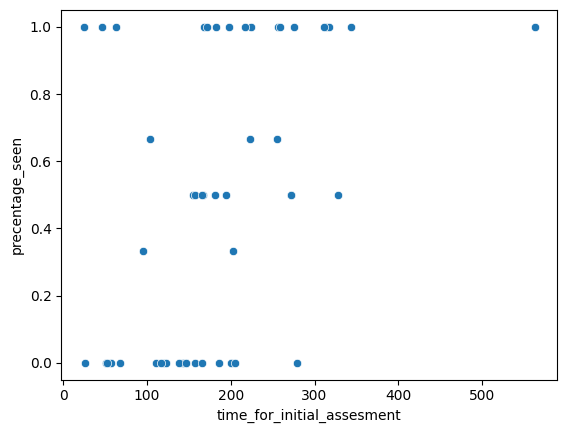

In [89]:
import seaborn as sns
def get_evidence_percentage_seen(x):
    if x != x:
        return float('nan')
    is_yes = [i=='Yes' for i in x if i is not None]
    if len(is_yes) == 0:
        return float('nan')
    return sum(is_yes) / len(is_yes)
processed_df['precentage_seen'] = processed_df.evidence_was_seen.apply(get_evidence_percentage_seen)
sns.scatterplot(processed_df, x='time_for_initial_assesment', y='precentage_seen')


In [128]:
evidence_df = []
for i, row in processed_df.iterrows():
    if row['evidence'] != row['evidence']:
        continue
    evidence_info_keys = [
        'notes', 'query', 'day', 'evidence', 'evidence_was_seen', 'hallucination_ann', 'cancer impact',
        'pneumonia impact', 'pulmonary edema impact', 'cancer relevance',
        'pneumonia relevance', 'pulmonary edema relevance', 'cancer relevance dh',
        'pneumonia relevance dh', 'pulmonary edema relevance dh']
    for j, evidence_info in enumerate(list(zip(*[
            row[key] if row[key] == row[key] else [None] * len(row['evidence'])
            for key in evidence_info_keys]))):
        # import pdb; pdb.set_trace()
        evidence_df.append({
            'annotator': row['annotator'],
            'model_type': row['model_type'],
            'sort_type': row['sort_type'],
            'instance_index': row['instance_index'],
        })
        evidence_df[-1].update({
            k: v for k, v in zip(evidence_info_keys, evidence_info)
            if v is not None})
        impact_keys = [
            x for x in [
                'cancer impact', 'pneumonia impact', 'pulmonary edema impact']
                if x in evidence_df[-1].keys()]
        if len(impact_keys) > 0:
            evidence_df[-1]['avg_impact'] = sum([
                evidence_df[-1][x]=='Yes' for x in impact_keys]) / len(impact_keys)
        relevance_keys = [
            x for x in [
                'cancer relevance', 'pneumonia relevance',
                'pulmonary edema relevance']
                if x in evidence_df[-1].keys()]
        if len(relevance_keys) > 0:
            evidence_df[-1]['Usefulness'] = max([
                evidence_df[-1][x] for x in relevance_keys])
            if evidence_df[-1]['Usefulness'] < 0:
                evidence_df[-1]['Usefulness of Hallucinations'] = max([
                    evidence_df[-1][x + ' dh'] for x in relevance_keys])
                for usefulness, key in enumerate([
                        'Not Relevant Hallucinations',
                        'Weak Correlation Hallucinations',
                        'Useful Hallucinations',
                        'Very Useful Hallucinations']):
                    evidence_df[-1][key] = 1 \
                        if usefulness == evidence_df[-1]['Usefulness of Hallucinations'] else 0
        for usefulness, key in enumerate([
                'Hallucinated', 'Partially Hallucinated', 'Not Relevant', 'Weak Correlation', 'Useful', 'Very Useful']):
            evidence_df[-1][key] = 1 \
                if (usefulness - 2) == evidence_df[-1]['Usefulness'] else 0
        evidence_df[-1]['count'] = 1

    # all_notes = row['notes'] if row['notes'] == row['notes'] else [None] * len(row['evidence'])
    # all_queries = row['query'] if row['query'] == row['query'] else [None] * len(row['evidence'])
    # all_days = row['day'] if row['day'] == row['day'] else [None] * len(row['day'])
    # evidence_was_seen = row['evidence_was_seen'] if row['evidence_was_seen'] == row['evidence_was_seen'] else [None] * len(row['evidence_was_seen'])
    # impacts = {}
    # if row['cancer impact'] == row['cancer impact']:
    #     impacts['cancer'] = row['cancer impact']
    # if row['pneumonia impact'] == row['pneumonia impact']:
    #     impacts['pneumonia'] = row['pneumonia impact']
    # if row['pulmonary edema impact'] == row['pulmonary edema impact']:
    #     impacts['pulmonary edema'] = row['pulmonary edema impact']
    # keys = list(impacts.keys())
    # for j, (evidence, notes, query, day, evid_seen, impact) in enumerate(zip(
    #         row['evidence'], all_notes, all_queries, all_days,
    #         evidence_was_seen, zip(*[impacts[key] for key in keys]))):
    #     evidence_df.append({
    #         'annotator': row['annotator'],
    #         'model_type': row['model_type'],
    #         'sort_type': row['sort_type'],
    #         'instance_index': row['instance_index'],
    #         'notes': notes,
    #         'evidence': evidence,
    #         'query': query,
    #         'day': day,
    #         'evidence_was_seen': evid_seen,
    #     })
    #     keys_temp = [k for k, im in zip(keys, impact) if im is not None]
    #     impact_temp = [1 if im=='Yes' else 0 for im in impact if im is not None]
    #     if len(impact_temp) > 0:
    #         avg_impact = sum(impact_temp) / len(impact_temp)
    #         evidence_df[-1]['avg_impact'] = avg_impact
    #         for key, im in zip(keys_temp, impact_temp):
    #             evidence_df[-1][key + ' impact'] = im
evidence_df = pd.DataFrame(evidence_df)
evidence_df['model'] = evidence_df.apply(lambda r: str((r.model_type, r.sort_type)), axis=1)
evidence_df

,annotator,model_type,sort_type,instance_index,notes,query,day,evidence,evidence_was_seen,cancer impact,...,Useful,Very Useful,count,hallucination_ann,Usefulness of Hallucinations,Not Relevant Hallucinations,Weak Correlation Hallucinations,Useful Hallucinations,Very Useful Hallucinations,model
0,Andrea,llm_evidence,LLM Confidence,49,Only one piece of relevant evidence because hu...,cancer (diagnosis),-387,The liver is nodular and coarse in echotexture...,Yes,Yes,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'LLM Confidence')"
1,Andrea,llm_evidence,LLM Confidence,51,,pulmonary edema (diagnosis),0,The patient has a chest tube.\nSigns: The uppe...,Yes,NaN,...,0,0,1,No,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'LLM Confidence')"
2,Andrea,llm_evidence,LLM Confidence,51,,pneumonia (diagnosis),0,The patient has a chest tube.,NaN,NaN,...,0,0,1,No,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'LLM Confidence')"
3,Andrea,llm_evidence,LLM Confidence,52,,pulmonary edema (diagnosis),-15,The patient has a first degree A-V block.,NaN,NaN,...,0,0,1,No,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'LLM Confidence')"
4,Andrea,llm_evidence,LLM Confidence,52,,tiredness (risk factor),-15,The patient has a sinus bradycardia.,NaN,NaN,...,0,0,1,No,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'LLM Confidence')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Geoff,llm_evidence,Sort by MSE with the bias logits,144,,pulmonary edema (diagnosis),-5,Moderately depressed LVEF,No,NaN,...,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'Sort by MSE with the bias lo..."
160,Geoff,llm_evidence,Sort by MSE with the bias logits,144,,pulmonary edema (diagnosis),-5,The patient has a Swan-Ganz catheter in the ri...,NaN,NaN,...,0,0,1,No,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'Sort by MSE with the bias lo..."
161,Geoff,llm_evidence,Sort by MSE with the bias logits,149,,cancer (diagnosis),-643,The breasts are dense. Within the right centra...,Yes,Yes,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'Sort by MSE with the bias lo..."
162,Geoff,llm_evidence,Sort by MSE with the bias logits,149,,cancer (diagnosis),-527,The patient has a mass in her breast.,Yes,Yes,...,0,0,1,Partially,1.0,0.0,1.0,0.0,0.0,"('llm_evidence', 'Sort by MSE with the bias lo..."


In [129]:
print(evidence_df[evidence_df.instance_index==75].iloc[-2])
print(evidence_df[evidence_df.instance_index==75].iloc[-1])

annotator                                                                       Lucy
model_type                                                              llm_evidence
sort_type                                                             LLM Confidence
instance_index                                                                    75
notes                                                                               
query                                                       chest pain (risk factor)
day                                                                               -1
evidence                           Resp: lungs clear,sats 96-98 on 3l np,has pain...
evidence_was_seen                                                                 No
cancer impact                                                                     No
pneumonia impact                                                                  No
pulmonary edema impact                                           

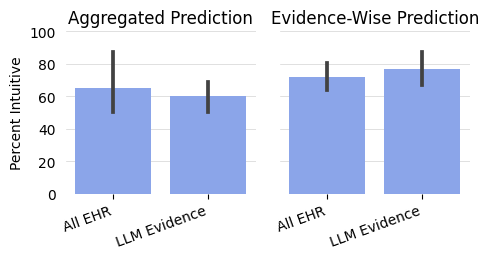

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(4.9, 2.7), sharey=True)
processed_df_temp = processed_df.copy()
models = {'llm_evidence': 'LLM Evidence', 'all_sentences': 'All EHR'}
processed_df_temp['model_type'] = processed_df_temp['model_type'].apply(
    lambda x: models[x])
processed_df_temp = processed_df_temp.groupby(['annotator', 'model_type']).agg({'prediction_aligns': np.mean}).reset_index()
processed_df_temp['prediction_aligns'] = processed_df_temp['prediction_aligns'] * 100
processed_df_temp = pd.concat([processed_df_temp[processed_df_temp.model_type == mt] for mt in ['All EHR', 'LLM Evidence']])
sns.barplot(data=processed_df_temp.rename(columns={'prediction_aligns': 'Percent Intuitive', 'model_type': 'Model'}),
            y='Percent Intuitive', x='Model', ax=axs[0], color=sns.color_palette("coolwarm", 4)[0])
axs[0].set_title('Aggregated Prediction', fontsize=12)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].set_xlabel('')
evidence_df_temp = evidence_df.copy()
evidence_df_temp['model_type'] = evidence_df_temp['model_type'].apply(
    lambda x: models[x])
evidence_df_temp = evidence_df_temp.groupby(['annotator', 'model_type']).agg({'avg_impact': np.mean}).reset_index()
evidence_df_temp['avg_impact'] = evidence_df_temp['avg_impact'] * 100
evidence_df_temp = pd.concat([evidence_df_temp[evidence_df_temp.model_type == mt] for mt in ['All EHR', 'LLM Evidence']])
sns.barplot(
    data=evidence_df_temp.rename(columns={'avg_impact': 'Percent Intuitive', 'model_type': 'Model'}),
    y='Percent Intuitive', x='Model', ax=axs[1], color=sns.color_palette("coolwarm", 4)[0])
axs[1].set_title('Evidence-Wise Prediction', fontsize=12)
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_xticklabels(
    axs[1].get_xticklabels(),
    rotation=20,
    horizontalalignment='right'
)
axs[0].set_xticklabels(
    axs[0].get_xticklabels(),
    rotation=20, 
    horizontalalignment='right'
)
axs[0].set_ylim(0, 100)
# axs[0].yaxis.set_tick_params(width=0)
axs[1].grid(True, axis='y', linestyle='-', linewidth=0.5, color='lightgray')
axs[1].yaxis.set_tick_params(width=0)
axs[1].set_axisbelow(True)
axs[0].grid(True, axis='y', linestyle='-', linewidth=0.5, color='lightgray')
axs[0].yaxis.set_tick_params(width=0)
axs[0].set_axisbelow(True)
fig.tight_layout()
fig.savefig('figures/percent_intuitive.pdf')

<Axes: xlabel='num_reports', ylabel='time_for_initial_assesment'>

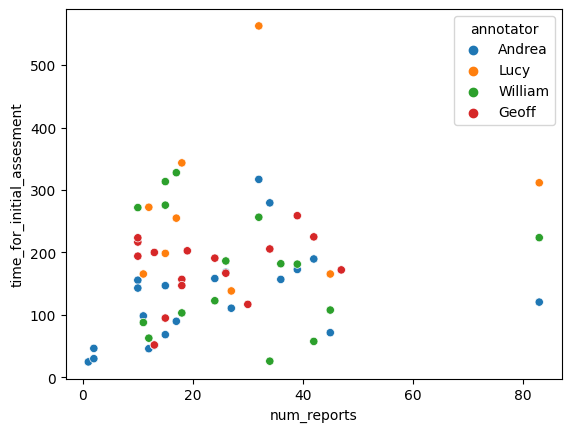

In [131]:
import seaborn as sns
sns.scatterplot(data=processed_df, x='num_reports', y='time_for_initial_assesment', hue='annotator')

In [132]:
processed_df.time_for_initial_assesment.mean()

172.04031177874535

In [133]:
processed_df.num_annotated_evidence.mean()

3.189655172413793

In [134]:
evidence_df.keys()

Index(['annotator', 'model_type', 'sort_type', 'instance_index', 'notes',
       'query', 'day', 'evidence', 'evidence_was_seen', 'cancer impact',
       'pneumonia impact', 'pulmonary edema impact', 'cancer relevance',
       'pneumonia relevance', 'pulmonary edema relevance',
       'cancer relevance dh', 'pneumonia relevance dh',
       'pulmonary edema relevance dh', 'avg_impact', 'Usefulness',
       'Hallucinated', 'Partially Hallucinated', 'Not Relevant',
       'Weak Correlation', 'Useful', 'Very Useful', 'count',
       'hallucination_ann', 'Usefulness of Hallucinations',
       'Not Relevant Hallucinations', 'Weak Correlation Hallucinations',
       'Useful Hallucinations', 'Very Useful Hallucinations', 'model'],
      dtype='object')

In [135]:
evidence_df

,annotator,model_type,sort_type,instance_index,notes,query,day,evidence,evidence_was_seen,cancer impact,...,Useful,Very Useful,count,hallucination_ann,Usefulness of Hallucinations,Not Relevant Hallucinations,Weak Correlation Hallucinations,Useful Hallucinations,Very Useful Hallucinations,model
0,Andrea,llm_evidence,LLM Confidence,49,Only one piece of relevant evidence because hu...,cancer (diagnosis),-387,The liver is nodular and coarse in echotexture...,Yes,Yes,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'LLM Confidence')"
1,Andrea,llm_evidence,LLM Confidence,51,,pulmonary edema (diagnosis),0,The patient has a chest tube.\nSigns: The uppe...,Yes,NaN,...,0,0,1,No,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'LLM Confidence')"
2,Andrea,llm_evidence,LLM Confidence,51,,pneumonia (diagnosis),0,The patient has a chest tube.,NaN,NaN,...,0,0,1,No,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'LLM Confidence')"
3,Andrea,llm_evidence,LLM Confidence,52,,pulmonary edema (diagnosis),-15,The patient has a first degree A-V block.,NaN,NaN,...,0,0,1,No,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'LLM Confidence')"
4,Andrea,llm_evidence,LLM Confidence,52,,tiredness (risk factor),-15,The patient has a sinus bradycardia.,NaN,NaN,...,0,0,1,No,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'LLM Confidence')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Geoff,llm_evidence,Sort by MSE with the bias logits,144,,pulmonary edema (diagnosis),-5,Moderately depressed LVEF,No,NaN,...,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'Sort by MSE with the bias lo..."
160,Geoff,llm_evidence,Sort by MSE with the bias logits,144,,pulmonary edema (diagnosis),-5,The patient has a Swan-Ganz catheter in the ri...,NaN,NaN,...,0,0,1,No,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'Sort by MSE with the bias lo..."
161,Geoff,llm_evidence,Sort by MSE with the bias logits,149,,cancer (diagnosis),-643,The breasts are dense. Within the right centra...,Yes,Yes,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,"('llm_evidence', 'Sort by MSE with the bias lo..."
162,Geoff,llm_evidence,Sort by MSE with the bias logits,149,,cancer (diagnosis),-527,The patient has a mass in her breast.,Yes,Yes,...,0,0,1,Partially,1.0,0.0,1.0,0.0,0.0,"('llm_evidence', 'Sort by MSE with the bias lo..."


In [136]:
evidence_counts = evidence_df.groupby(['model_type', 'sort_type']).agg({
    'Hallucinated': np.sum,
    'Partially Hallucinated': np.sum,
    'Not Relevant': np.sum,
    'Weak Correlation': np.sum,
    'Useful': np.sum,
    'Very Useful': np.sum,
})
print(evidence_counts.to_markdown())
print((evidence_counts.div(evidence_counts.sum(axis=1), axis=0) * 100).to_markdown())

|                                                       |   Hallucinated |   Partially Hallucinated |   Not Relevant |   Weak Correlation |   Useful |   Very Useful |
|:------------------------------------------------------|---------------:|-------------------------:|---------------:|-------------------:|---------:|--------------:|
| ('all_sentences', 'Sort by MSE with the bias logits') |              0 |                        0 |             22 |                 21 |        8 |             5 |
| ('llm_evidence', 'LLM Confidence')                    |              1 |                        0 |             36 |                  8 |        9 |             1 |
| ('llm_evidence', 'Sort by MSE with the bias logits')  |              2 |                        2 |             14 |                 15 |       10 |            10 |
|                                                       |   Hallucinated |   Partially Hallucinated |   Not Relevant |   Weak Correlation |   Useful |   Very Useful 

In [137]:
print(evidence_df.groupby(['model_type', 'sort_type']).agg({
    'Not Relevant Hallucinations': np.sum,
    'Weak Correlation Hallucinations': np.sum,
    'Useful Hallucinations': np.sum,
    'Very Useful Hallucinations': np.sum,
}).to_markdown())

|                                                       |   Not Relevant Hallucinations |   Weak Correlation Hallucinations |   Useful Hallucinations |   Very Useful Hallucinations |
|:------------------------------------------------------|------------------------------:|----------------------------------:|------------------------:|-----------------------------:|
| ('all_sentences', 'Sort by MSE with the bias logits') |                             0 |                                 0 |                       0 |                            0 |
| ('llm_evidence', 'LLM Confidence')                    |                             0 |                                 1 |                       0 |                            0 |
| ('llm_evidence', 'Sort by MSE with the bias logits')  |                             0 |                                 1 |                       3 |                            0 |


In [138]:
import os
def plot_evidence_stacked(evidence_df, filename=None, ax=None, percent=True, horizontal=True):
    df_stacked = evidence_df.groupby(['model'])[
        ['Hallucinated', 'Partially Hallucinated', 'Not Relevant', 'Weak Correlation', 'Useful', 'Very Useful', 'count']].agg(np.sum).reset_index()
    models = {'llm_evidence': 'LLM Evidence', 'all_sentences': 'All EHR'}
    sort_methods = {'Sort by MSE with the bias logits': 'Log Odds Sorting', 'LLM Confidence': 'Confidence Sorting'}
    df_stacked['Model'] = df_stacked['model'].apply(lambda x: models[eval(x)[0]]+'\n+'+sort_methods[eval(x)[1]])
    df_stacked = df_stacked.set_index('Model')
    ratings = ['Hallucinated', 'Partially Hallucinated', 'Very Useful', 'Useful', 'Weak Correlation', 'Not Relevant']
    if percent:
        for x in ratings:
            df_stacked[x] = df_stacked.apply(lambda r: 100 * r[x] / r['count'], axis=1)
    df_stacked = pd.concat([
        df_stacked[df_stacked.index=='LLM Evidence\n+Log Odds Sorting'],
        df_stacked[df_stacked.index=='All EHR\n+Log Odds Sorting'],
        df_stacked[df_stacked.index=='LLM Evidence\n+Confidence Sorting'],
    ])
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4.8, 3.2))
    else:
        fig = None
    df_stacked_temp = df_stacked.copy()
    if percent:
        df_stacked_temp = df_stacked_temp.rename(index={
            k: f'{k}\n(n={int(v)})' for k, v in df_stacked['count'].to_dict().items()})
    df_stacked_temp = df_stacked_temp.rename(columns={'Partially Hallucinated': 'Partially Hallu.'})
    chart = df_stacked_temp[
        ['Very Useful', 'Useful', 'Weak Correlation', 'Not Relevant', 'Partially Hallu.', 'Hallucinated']].plot(
        kind='barh' if horizontal else 'bar', stacked=True,
        color=list(sns.color_palette("coolwarm", 4)) + ['grey', 'black'],
        width=0.75,
        ax=ax)
    measure = 'Evidence Percent' if percent else 'Evidence Count'
    chart.set_ylabel('' if horizontal else measure)
    chart.set_xlabel(measure if horizontal else '')
    chart.legend(
        prop={'size': 9}, ncol=3, loc="upper center",
        bbox_to_anchor=(0.18, 1.3), frameon=False)
    if horizontal:
        chart.set_yticklabels(
            chart.get_yticklabels(),
            horizontalalignment='left',
            # weight='bold',
            fontsize=11,
        )
        yax = ax.get_yaxis()
        pad = max(T.label1.get_window_extent().width-35 for T in yax.majorTicks)
        yax.set_tick_params(pad=pad)
        if percent:
            chart.axis([0, 100, -.4, 3-.6])
        plt.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=False,)
    else:
        chart.set_xticklabels(
            chart.get_xticklabels(),
            horizontalalignment='right',
            # weight='bold',
            rotation=15,
            fontsize=11,
        )
        if percent:
            chart.axis([-.4, 3-.6, 0, 100])
    # chart.set_xticks([])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if not os.path.exists('figures'):
        os.makedirs("figures")
    if fig is not None:
        fig.tight_layout()
        if filename is not None:
            fig.savefig(filename)

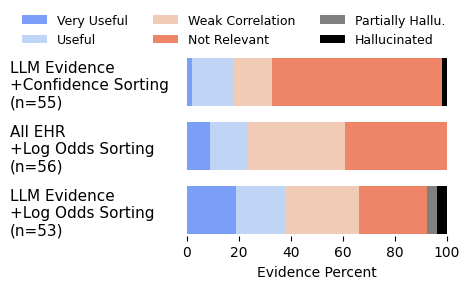

In [139]:
plot_evidence_stacked(evidence_df, filename='figures/model_evidence.pdf')

In [140]:
print(evidence_df.groupby(['model_type', 'sort_type']).agg({
    'Not Relevant Hallucinations': np.sum,
    'Weak Correlation Hallucinations': np.sum,
    'Useful Hallucinations': np.sum,
    'Very Useful Hallucinations': np.sum,
}).to_latex())

\begin{tabular}{llrrrr}
\toprule
 &  & Not Relevant Hallucinations & Weak Correlation Hallucinations & Useful Hallucinations & Very Useful Hallucinations \\
model_type & sort_type &  &  &  &  \\
\midrule
all_sentences & Sort by MSE with the bias logits & 0.000000 & 0.000000 & 0.000000 & 0.000000 \\
\cline{1-6}
\multirow[t]{2}{*}{llm_evidence} & LLM Confidence & 0.000000 & 1.000000 & 0.000000 & 0.000000 \\
 & Sort by MSE with the bias logits & 0.000000 & 1.000000 & 3.000000 & 0.000000 \\
\cline{1-6}
\bottomrule
\end{tabular}



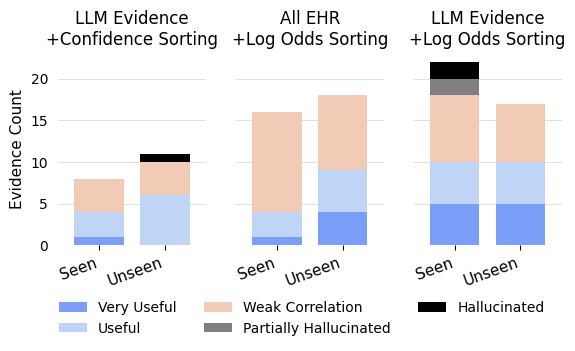

In [141]:
fig, axs = plt.subplots(1, 3, figsize=(6.5, 2.5), sharey=True)
df_stacked = evidence_df[~evidence_df.evidence_was_seen.isna()].groupby(['model', 'evidence_was_seen'])[
        ['Hallucinated', 'Partially Hallucinated', 'Weak Correlation', 'Useful', 'Very Useful']].agg(np.sum).reset_index()
models = {'llm_evidence': 'LLM Evidence', 'all_sentences': 'All EHR'}
sort_methods = {'Sort by MSE with the bias logits': 'Log Odds Sorting', 'LLM Confidence': 'Confidence Sorting'}
df_stacked['Model'] = df_stacked['model'].apply(lambda x: models[eval(x)[0]]+'\n+'+sort_methods[eval(x)[1]])
df_stacked['seen_vs_unseen'] = df_stacked['evidence_was_seen'].apply(lambda x: 'Seen' if x=='Yes' else 'Unseen')
df_stacked = pd.concat([df_stacked[df_stacked.seen_vs_unseen == x] for x in ['Seen', 'Unseen']])
df_stacked = df_stacked.set_index('seen_vs_unseen')
ratings = ['Very Useful', 'Useful', 'Weak Correlation', 'Partially Hallucinated', 'Hallucinated']
for i, model in enumerate(['LLM Evidence\n+Confidence Sorting', 'All EHR\n+Log Odds Sorting',
              'LLM Evidence\n+Log Odds Sorting']):
    df_stacked_temp = df_stacked[df_stacked.Model == model]
    chart = df_stacked_temp[
        ['Very Useful', 'Useful', 'Weak Correlation', 'Partially Hallucinated', 'Hallucinated']].plot(
        kind='bar', stacked=True,
        color=sns.color_palette("coolwarm", 4)[:-1] + ['grey', 'black'],
        width=0.75,
        ax=axs[i])
    chart.set_ylabel('Evidence Count', fontsize=11)
    chart.set_xlabel('')
    chart.grid(True, axis='y', linestyle='-', linewidth=0.5, color='lightgray')
    chart.yaxis.set_tick_params(width=0)
    chart.set_axisbelow(True)
    chart.spines['right'].set_visible(False)
    chart.spines['top'].set_visible(False)
    chart.spines['left'].set_visible(False)
    chart.spines['bottom'].set_visible(False)
    chart.get_legend().remove()
    chart.set_xticklabels(
        chart.get_xticklabels(),
        horizontalalignment='right',
        # weight='bold',
        rotation=20,
        fontsize=11,
    )
    # chart.set_ylim(0, 20)
    chart.set_title(model)
# axs[1].legend(
#             prop={'size': 11}, ncol=3, loc="upper center",
#             bbox_to_anchor=(.5, -.2), frameon=False)
handles, labels = axs[2].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='lower center', ncols=3, frameon=False, bbox_to_anchor=(.5, -.3))
fig.savefig('figures/seen_vs_unseen_evidence.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [142]:
processed_df.num_annotated_evidence.mean()

3.189655172413793

In [143]:
processed_df.keys()

Index(['annotator', 'instance_index', 'num_reports', 'model_type', 'sort_type',
       'prediction_aligns', 'time_for_initial_assesment', 'cancer in future',
       'pneumonia in future', 'pulmonary edema in future',
       'num_annotated_evidence', 'is_duplicate', 'notes', 'score', 'evidence',
       'query', 'day', 'report_number', 'evidence_was_seen',
       'hallucination_ann', 'cancer relevance', 'cancer relevance dh',
       'cancer impact', 'pneumonia relevance', 'pneumonia relevance dh',
       'pneumonia impact', 'pulmonary edema relevance',
       'pulmonary edema relevance dh', 'pulmonary edema impact', 'cancer',
       'pneumonia', 'pulmonary edema', 'cancer(changed)', 'pneumonia(changed)',
       'pulmonary edema(changed)', 'precentage_seen'],
      dtype='object')

In [144]:
# processed_df_temp = processed_df.copy()
# processed_df_temp['Instances Seen'] = [1] * len(processed_df_temp)
# processed_df_temp = processed_df_temp.groupby(['annotator', 'model_type', 'sort_type']).agg(
#     {'count': np.sum, 'num_annotated_evidence': np.sum, 'num_reports': np.sum})
# processed_df_temp
instance_num_reports = {}
for i, row in processed_df.iterrows():
    instance_num_reports[row['instance_index']] = row['num_reports']
print(instance_num_reports)
evidence_df_temp = evidence_df.copy()
evidence_df_temp['Percent Useful'] = evidence_df_temp['Usefulness'].apply(
    lambda x: x if x != x else 100 if x >= 2 else 0)
evidence_df_temp = evidence_df_temp.groupby(['annotator', 'model']).agg({
    'count': np.sum,
    'instance_index': lambda x: set(x),
    'Usefulness': np.mean,
    'Percent Useful': np.mean,
})
evidence_df_temp['Instances'] = evidence_df_temp['instance_index'].apply(
    lambda x: len(x))
evidence_df_temp['Reports'] = evidence_df_temp['instance_index'].apply(
    lambda x: sum([instance_num_reports[i] for i in x]))
evidence_df_temp = evidence_df_temp.reset_index().rename(
    columns={'count': 'Evidence', 'Usefulness': 'Avg. Usefulness'})
evidence_df_temp = evidence_df_temp[['annotator', 'model', 'Instances', 'Evidence', 'Reports', 'Avg. Usefulness', 'Percent Useful']]
evidence_df_temp

{49: 26, 50: 42, 51: 1, 52: 2, 53: 2, 54: 24, 66: 12, 68: 10, 75: 11, 84: 17, 86: 15, 94: 34, 0: 32, 62: 18, 97: 83, 105: 45, 107: 27, 111: 39, 117: 15, 121: 36, 127: 10, 135: 13, 136: 10, 137: 13, 139: 19, 141: 30, 144: 18, 149: 47}


,annotator,model,Instances,Evidence,Reports,Avg. Usefulness,Percent Useful
0,Andrea,"('all_sentences', 'Sort by MSE with the bias l...",5,14,81,0.500000,7.142857
1,Andrea,"('llm_evidence', 'LLM Confidence')",8,20,195,0.250000,5.000000
2,Andrea,"('llm_evidence', 'Sort by MSE with the bias lo...",6,13,154,1.153846,30.769231
3,Geoff,"('all_sentences', 'Sort by MSE with the bias l...",6,20,127,0.900000,20.000000
4,Geoff,"('llm_evidence', 'LLM Confidence')",5,16,132,0.562500,18.750000
5,Geoff,"('llm_evidence', 'Sort by MSE with the bias lo...",4,12,85,1.333333,41.666667
6,Lucy,"('all_sentences', 'Sort by MSE with the bias l...",2,5,72,1.000000,40.000000
7,Lucy,"('llm_evidence', 'LLM Confidence')",2,6,26,1.000000,50.000000
8,Lucy,"('llm_evidence', 'Sort by MSE with the bias lo...",5,14,162,0.857143,35.714286
9,William,"('all_sentences', 'Sort by MSE with the bias l...",6,17,224,1.294118,35.294118


In [145]:
evidence_df_temp_agg = evidence_df_temp.groupby(['model']).agg({
    'Instances': np.sum,
    'Evidence': np.sum,
    'Reports': np.sum,
    'Avg. Usefulness': np.mean,
    'Percent Useful': np.mean,
})
evidence_df_temp_agg

,Instances,Evidence,Reports,Avg. Usefulness,Percent Useful
model,,,,,
"('all_sentences', 'Sort by MSE with the bias logits')",19,56,504,0.923529,25.609244
"('llm_evidence', 'LLM Confidence')",19,55,458,0.587740,24.206731
"('llm_evidence', 'Sort by MSE with the bias logits')",20,53,520,1.121795,37.751832


In [146]:
annotators = {
    '1': 'Andrea',
    '2': 'Lucy',
    '3': 'William',
    '4': 'Geoff',
}
models = {
    'LLM Evidence+Confidence Sorting': ('llm_evidence', 'LLM Confidence'),
    'Raw EHR+Log Odds Sorting': ('all_sentences', 'Sort by MSE with the bias logits'),
    'LLM Evidence+Log Odds Sorting': ('llm_evidence', 'Sort by MSE with the bias logits'),
}
measurements = {
    'Inst.': 'Instances',
    'Evid.': 'Evidence',
    'Rep.': 'Reports',
    'Percent Useful': 'Percent Useful',
}
latex_table = ""
for i, (model, model_key) in enumerate(models.items()):
    latex_table += "& \\multicolumn{4}{c"
    if i < len(models) - 1:
        latex_table += "|"
    latex_table += "}{" + model + "} "
latex_table += "\\\\\nAnnotator "
for model, model_key in models.items():
    for measurement_name, measurement_key in measurements.items():
        latex_table += f"& {measurement_name} "
latex_table += "\\\\\n\hline\n"
for annotator, ann_key in annotators.items():
    latex_table += f"{annotator} "
    for model, model_key in models.items():
        rows = evidence_df_temp[
            (evidence_df_temp.annotator == ann_key) &
            (evidence_df_temp.model == str(model_key))]
        for measurement_name, measurement_key in measurements.items():
            if len(rows) == 0:
                latex_table += "& - "
            else:
                measurement = rows.iloc[0][measurement_key]
                if isinstance(measurement, float):
                    latex_table += "& {:.1f} ".format(measurement)
                else:
                    latex_table += "& {} ".format(measurement)
    latex_table += "\\\\\n"
latex_table += "\hline\nAggregated "
for model, model_key in models.items():
    measurements_agg = evidence_df_temp_agg.loc[str(model_key)]
    for measurement_name, measurement_key in measurements.items():
        measurement = measurements_agg[measurement_key]
        if measurement_name in ['Percent Useful']:
            latex_table += "& {:.1f} ".format(measurement)
        else:
            latex_table += "& {} ".format(int(measurement))
latex_table += "\\\\\n"
print(latex_table)

& \multicolumn{4}{c|}{LLM Evidence+Confidence Sorting} & \multicolumn{4}{c|}{Raw EHR+Log Odds Sorting} & \multicolumn{4}{c}{LLM Evidence+Log Odds Sorting} \\
Annotator & Inst. & Evid. & Rep. & Percent Useful & Inst. & Evid. & Rep. & Percent Useful & Inst. & Evid. & Rep. & Percent Useful \\
\hline
1 & 8 & 20 & 195 & 5.0 & 5 & 14 & 81 & 7.1 & 6 & 13 & 154 & 30.8 \\
2 & 2 & 6 & 26 & 50.0 & 2 & 5 & 72 & 40.0 & 5 & 14 & 162 & 35.7 \\
3 & 4 & 13 & 105 & 23.1 & 6 & 17 & 224 & 35.3 & 5 & 14 & 119 & 42.9 \\
4 & 5 & 16 & 132 & 18.8 & 6 & 20 & 127 & 20.0 & 4 & 12 & 85 & 41.7 \\
\hline
Aggregated & 19 & 55 & 458 & 24.2 & 19 & 56 & 504 & 25.6 & 20 & 53 & 520 & 37.8 \\



In [147]:
from collections import Counter, defaultdict
query_counts = defaultdict(lambda : Counter())
for i, row in processed_df.iterrows():
    relevance_keys = [k for k in row.keys() if k.endswith(' relevance')]
    if row[relevance_keys[0]] == row[relevance_keys[0]] and \
            row['query'] == row['query']:
        for x in zip(row['query'], *[row[k] for k in relevance_keys]):
            query_counts[x[0]][max(x[1:])] += 1
query_counts = pd.DataFrame(query_counts).transpose()
query_counts

,1,3,2,0,-2,-1
cancer (diagnosis),8.0,5.0,1.0,4.0,1.0,1.0
pulmonary edema (diagnosis),2.0,1.0,3.0,6.0,NaN,NaN
pneumonia (diagnosis),6.0,2.0,5.0,1.0,1.0,NaN
tiredness (risk factor),NaN,1.0,NaN,4.0,NaN,NaN
a low ejection fraction (risk factor),4.0,NaN,4.0,5.0,1.0,NaN
neuralogical problems (risk factor),1.0,2.0,NaN,13.0,NaN,1.0
a history of smoking (risk factor),NaN,NaN,1.0,1.0,NaN,NaN
jaundice (risk factor),NaN,NaN,NaN,1.0,NaN,NaN
a compromised immune system (risk factor),NaN,NaN,2.0,1.0,NaN,NaN
large neck lymph nodes (risk factor),1.0,NaN,NaN,3.0,NaN,NaN


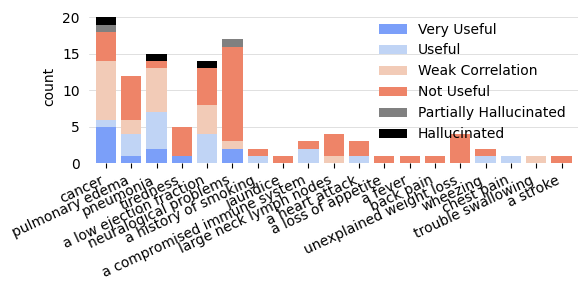

In [148]:
fig, axs = plt.subplots(1, 1, figsize=(6, 3))
chart = query_counts.rename(
    columns={0: 'Not Useful', 1: 'Weak Correlation', 2: 'Useful', 3: 'Very Useful', -1: 'Partially Hallucinated', -2: 'Hallucinated'},
    index=lambda x: x.split(' (')[0],
    )[['Very Useful', 'Useful', 'Weak Correlation', 'Not Useful', 'Partially Hallucinated', 'Hallucinated']].plot(
    kind='bar', stacked=True, color=sns.color_palette("coolwarm", 4) + ['grey', 'black'],
    width=0.8,
    ax=axs)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['bottom'].set_visible(False)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=25,
    horizontalalignment='right'
)
chart.legend(frameon=False)
chart.set_ylabel('count')
chart.grid(True, axis='y', linestyle='-', linewidth=0.5, color='lightgray')
chart.yaxis.set_tick_params(width=0)
chart.set_axisbelow(True)
fig.tight_layout()
fig.savefig('figures/query_usefulness.pdf')

In [149]:
processed_df.columns

Index(['annotator', 'instance_index', 'num_reports', 'model_type', 'sort_type',
       'prediction_aligns', 'time_for_initial_assesment', 'cancer in future',
       'pneumonia in future', 'pulmonary edema in future',
       'num_annotated_evidence', 'is_duplicate', 'notes', 'score', 'evidence',
       'query', 'day', 'report_number', 'evidence_was_seen',
       'hallucination_ann', 'cancer relevance', 'cancer relevance dh',
       'cancer impact', 'pneumonia relevance', 'pneumonia relevance dh',
       'pneumonia impact', 'pulmonary edema relevance',
       'pulmonary edema relevance dh', 'pulmonary edema impact', 'cancer',
       'pneumonia', 'pulmonary edema', 'cancer(changed)', 'pneumonia(changed)',
       'pulmonary edema(changed)', 'precentage_seen'],
      dtype='object')

In [150]:
processed_df_temp = processed_df.copy()
processed_df_temp = processed_df_temp[
    (~processed_df_temp['cancer(changed)'].isna()) |
    (~processed_df_temp['pneumonia(changed)'].isna()) |
    (~processed_df_temp['pulmonary edema(changed)'].isna())]
# processed_df_temp['max_evidence_score'] = max(
#     processed_df_temp['max_evidence_score'])
models = {'llm_evidence': 'LLM Evidence', 'all_sentences': 'All EHR'}
sort_methods = {'Sort by MSE with the bias logits': 'Log Odds Sorting', 'LLM Confidence': 'Confidence Sorting'}
processed_df_temp['Model'] = processed_df_temp.model_type.apply(lambda x: models[x])
processed_df_temp['Sorting'] = processed_df_temp.sort_type.apply(lambda x: sort_methods[x])
conditions = ['cancer', 'pulmonary edema', 'pneumonia']
def get_best_evidence_index(row):
    sorted_evidence = sorted(zip(range(len(row['evidence'])), *[row[f'{d} relevance'] for d in conditions]), key=lambda x: max(x[1:]))
    return sorted_evidence[-1][0]
processed_df_temp['best_evidence_idx'] = processed_df_temp.apply(get_best_evidence_index, axis=1)
processed_df_temp['Best Evidence'] = processed_df_temp.apply(
    lambda r: r.evidence[r.best_evidence_idx].replace('\n', '. '), axis=1)
for d in conditions:
    processed_df_temp[d.title()] = processed_df_temp.apply(
        lambda r: r[f'{d} relevance'][r.best_evidence_idx], axis=1)
verbalizers = ['Not Relevant to ', 'Weak Correlation with ', 'Useful for ', 'Very Useful for ']
def get_usefulness(r):
    max_score = max([r[f'{d} relevance'][r.best_evidence_idx] for d in conditions])
    return verbalizers[max_score] + ', '.join(
        ['\\textbf{' + d.title() + '}' for d in conditions if r[f'{d} relevance'][r.best_evidence_idx] == max_score])
processed_df_temp['Usefulness'] = processed_df_temp.apply(get_usefulness, axis=1)
def get_label(r):
    return ', '.join([c.title() for c in conditions if r[c + ' in future']])
processed_df_temp['Synthetic Label'] = processed_df_temp.apply(get_label, axis=1)
processed_df_temp['Changes'] = processed_df_temp.apply(
    lambda r: ', '.join([f'{d.title()}: {r[d]} $\\rightarrow$ ' + r[d+'(changed)'] for d in conditions if r[d+'(changed)'] == r[d+'(changed)']]), axis=1)
annotators = {
    'Andrea': '1',
    'Lucy': '2',
    'William': '3',
    'Geoff': '4',
}
processed_df_temp['Annotator'] = processed_df_temp.annotator.apply(lambda x: annotators[x])
processed_df_temp = processed_df_temp.rename(columns={'instance_index': 'Instance'})
processed_df_temp = processed_df_temp[['Instance', 'report_number', 'Annotator', 'Model', 'Sorting', 'Changes', 'Best Evidence', 'Usefulness', 'Synthetic Label', 'cancer relevance', 'pneumonia relevance', 'pulmonary edema relevance', 'cancer in future', 'pneumonia in future', 'pulmonary edema in future']]
processed_df_temp


,Instance,report_number,Annotator,Model,Sorting,Changes,Best Evidence,Usefulness,Synthetic Label,cancer relevance,pneumonia relevance,pulmonary edema relevance,cancer in future,pneumonia in future,pulmonary edema in future
17,84,"[9, 3, 3, 6]",3,All EHR,Log Odds Sorting,Cancer: Unlikely $\rightarrow$ Very likely,Basal cell skin ca. [**27**].,Useful for \textbf{Cancer},Pulmonary Edema,"[2, 0, 0, 1]","[0, 0, 0, 0]","[0, 0, 0, 0]",False,False,True
26,121,"[23, 34]",1,LLM Evidence,Log Odds Sorting,Pneumonia: Somewhat likely $\rightarrow$ Very ...,"CXR showed L middle/lower lobe PNA, prob asp PNA.",Very Useful for \textbf{Pneumonia},,"[0, 0]","[1, 3]","[1, 0]",False,False,False
35,62,"[3, 10]",4,All EHR,Log Odds Sorting,Cancer: Unlikely $\rightarrow$ Somewhat likely,"o.b.resident to see pt., pt.waiting for a ""bio...",Useful for \textbf{Cancer},Pulmonary Edema,"[2, 2]","[0, 0]","[0, 0]",False,False,True
51,86,"[1, 15, 2]",2,LLM Evidence,Confidence Sorting,Pneumonia: Unlikely $\rightarrow$ Somewhat likely,There is a small right pneumothorax. There is ...,Useful for \textbf{Pneumonia},Pneumonia,"[0, 0, 1]","[0, 0, 2]","[0, 0, 0]",False,True,False
54,137,"[7, 9, 2]",4,LLM Evidence,Confidence Sorting,Pulmonary Edema: Unlikely $\rightarrow$ Somewh...,Atrial fibrillation with rapid ventricular res...,Useful for \textbf{Pulmonary Edema},Pulmonary Edema,"[0, 0, 0]","[0, 0, 0]","[2, 2, 2]",False,False,True
58,139,"[4, 12, 1, 2, 1]",4,All EHR,Log Odds Sorting,Pulmonary Edema: Somewhat likely $\rightarrow$...,There is increased opacity in the. retrocardi...,Very Useful for \textbf{Pneumonia},,"[0, 0, 0, 0, 0]","[0, 1, 0, 0, 3]","[1, 0, 0, 0, 0]",False,False,False
60,144,"[10, 11, 9, 8]",4,LLM Evidence,Log Odds Sorting,Cancer: Unlikely $\rightarrow$ Very likely,CLL. Signs: id: pmh of CLL,Very Useful for \textbf{Cancer},,"[3, 0, 0, 0]","[0, 1, 0, 0]","[0, 0, 2, 0]",False,False,False


In [151]:
instance_order = [
    86,
    137,
    84,
    62,
    139,
    121,
    144,
]
processed_df_temp_ordered = pd.concat([
    processed_df_temp[processed_df_temp.Instance == ii]
    for ii in instance_order
])
instance_map = {inst: i for i, inst in enumerate(instance_order)}
processed_df_temp_ordered['Instance'] = processed_df_temp_ordered.Instance.apply(lambda x: instance_map[x])
processed_df_temp_ordered

,Instance,report_number,Annotator,Model,Sorting,Changes,Best Evidence,Usefulness,Synthetic Label,cancer relevance,pneumonia relevance,pulmonary edema relevance,cancer in future,pneumonia in future,pulmonary edema in future
51,0,"[1, 15, 2]",2,LLM Evidence,Confidence Sorting,Pneumonia: Unlikely $\rightarrow$ Somewhat likely,There is a small right pneumothorax. There is ...,Useful for \textbf{Pneumonia},Pneumonia,"[0, 0, 1]","[0, 0, 2]","[0, 0, 0]",False,True,False
54,1,"[7, 9, 2]",4,LLM Evidence,Confidence Sorting,Pulmonary Edema: Unlikely $\rightarrow$ Somewh...,Atrial fibrillation with rapid ventricular res...,Useful for \textbf{Pulmonary Edema},Pulmonary Edema,"[0, 0, 0]","[0, 0, 0]","[2, 2, 2]",False,False,True
17,2,"[9, 3, 3, 6]",3,All EHR,Log Odds Sorting,Cancer: Unlikely $\rightarrow$ Very likely,Basal cell skin ca. [**27**].,Useful for \textbf{Cancer},Pulmonary Edema,"[2, 0, 0, 1]","[0, 0, 0, 0]","[0, 0, 0, 0]",False,False,True
35,3,"[3, 10]",4,All EHR,Log Odds Sorting,Cancer: Unlikely $\rightarrow$ Somewhat likely,"o.b.resident to see pt., pt.waiting for a ""bio...",Useful for \textbf{Cancer},Pulmonary Edema,"[2, 2]","[0, 0]","[0, 0]",False,False,True
58,4,"[4, 12, 1, 2, 1]",4,All EHR,Log Odds Sorting,Pulmonary Edema: Somewhat likely $\rightarrow$...,There is increased opacity in the. retrocardi...,Very Useful for \textbf{Pneumonia},,"[0, 0, 0, 0, 0]","[0, 1, 0, 0, 3]","[1, 0, 0, 0, 0]",False,False,False
26,5,"[23, 34]",1,LLM Evidence,Log Odds Sorting,Pneumonia: Somewhat likely $\rightarrow$ Very ...,"CXR showed L middle/lower lobe PNA, prob asp PNA.",Very Useful for \textbf{Pneumonia},,"[0, 0]","[1, 3]","[1, 0]",False,False,False
60,6,"[10, 11, 9, 8]",4,LLM Evidence,Log Odds Sorting,Cancer: Unlikely $\rightarrow$ Very likely,CLL. Signs: id: pmh of CLL,Very Useful for \textbf{Cancer},,"[3, 0, 0, 0]","[0, 1, 0, 0]","[0, 0, 2, 0]",False,False,False


In [152]:
columns = processed_df_temp_ordered.columns[2:-6]
latex_table = " & ".join(columns) + " \\\\\n\hline\n"
for i, row in processed_df_temp_ordered.iterrows():
    latex_table += " & ".join([str(row[c]) for c in columns]) + " \\\\\n"
print(latex_table)

Annotator & Model & Sorting & Changes & Best Evidence & Usefulness & Synthetic Label \\
\hline
2 & LLM Evidence & Confidence Sorting & Pneumonia: Unlikely $\rightarrow$ Somewhat likely & There is a small right pneumothorax. There is extensive consolidation of the right upper lobe. Consolidation in the right lower lobe is mostly located in the superior segment. The left lung is grossly clear. There. Signs: There is extensive consolidation of the right upper lobe. Consolidation in the right lower lobe is mostly located in the superior segment. The left lung is grossly clear. There is no left pleural effusion. There is & Useful for \textbf{Pneumonia} & Pneumonia \\
4 & LLM Evidence & Confidence Sorting & Pulmonary Edema: Unlikely $\rightarrow$ Somewhat likely & Atrial fibrillation with rapid ventricular response. Compared to the previous tracing atrial fibrillation is seen. Other findings are similar. The patient is at risk of pulmonary edema. & Useful for \textbf{Pulmonary Edema} & Pulmo

In [153]:
print(len(evidence_df[(evidence_df.model_type=='llm_evidence')]))
print(len(evidence_df[(evidence_df.model_type=='llm_evidence') & (~evidence_df.hallucination_ann.isna())]))

108
42


In [154]:
hallucination_df = evidence_df[(~evidence_df.hallucination_ann.isna()) & (evidence_df.hallucination_ann != 'No')]
hallucination_df

,annotator,model_type,sort_type,instance_index,notes,query,day,evidence,evidence_was_seen,cancer impact,...,Useful,Very Useful,count,hallucination_ann,Usefulness of Hallucinations,Not Relevant Hallucinations,Weak Correlation Hallucinations,Useful Hallucinations,Very Useful Hallucinations,model
32,William,llm_evidence,LLM Confidence,68,More context dependent because does history of...,pneumonia (diagnosis),0,The patient has a history of sepsis.,No,NaN,...,0,0,1,Yes,1.0,0.0,1.0,0.0,0.0,"('llm_evidence', 'LLM Confidence')"
85,Lucy,llm_evidence,Sort by MSE with the bias logits,97,"Individually, this makes sense, but taken with...",neuralogical problems (risk factor),-7,The patient had a brain tumor removed.,Yes,Yes,...,0,0,1,Partially,2.0,0.0,0.0,1.0,0.0,"('llm_evidence', 'Sort by MSE with the bias lo..."
95,William,llm_evidence,Sort by MSE with the bias logits,117,,a low ejection fraction (risk factor),0,The patient has a history of heart failure.,Yes,NaN,...,0,0,1,Yes,2.0,0.0,0.0,1.0,0.0,"('llm_evidence', 'Sort by MSE with the bias lo..."
123,Lucy,llm_evidence,Sort by MSE with the bias logits,84,,cancer (diagnosis),-336,The patient has a bleeding colon lesion.,Yes,Yes,...,0,0,1,Yes,2.0,0.0,0.0,1.0,0.0,"('llm_evidence', 'Sort by MSE with the bias lo..."
162,Geoff,llm_evidence,Sort by MSE with the bias logits,149,,cancer (diagnosis),-527,The patient has a mass in her breast.,Yes,Yes,...,0,0,1,Partially,1.0,0.0,1.0,0.0,0.0,"('llm_evidence', 'Sort by MSE with the bias lo..."


In [126]:
hallucination_df.keys()

Index(['annotator', 'model_type', 'sort_type', 'instance_index', 'notes',
       'query', 'day', 'evidence_was_seen', 'cancer impact',
       'pneumonia impact', 'pulmonary edema impact', 'cancer relevance',
       'pneumonia relevance', 'pulmonary edema relevance',
       'cancer relevance dh', 'pneumonia relevance dh',
       'pulmonary edema relevance dh', 'avg_impact', 'Usefulness',
       'Hallucinated', 'Partially Hallucinated', 'Not Relevant',
       'Weak Correlation', 'Useful', 'Very Useful', 'count',
       'hallucination_ann', 'Usefulness of Hallucinations',
       'Not Relevant Hallucinations', 'Weak Correlation Hallucinations',
       'Useful Hallucinations', 'Very Useful Hallucinations', 'model'],
      dtype='object')

In [160]:
print(hallucination_df[['evidence', 'hallucination_ann', 'query', 'sort_type', 'evidence_was_seen', 'Usefulness of Hallucinations']].to_latex())

\begin{tabular}{llllllr}
\toprule
 & evidence & hallucination_ann & query & sort_type & evidence_was_seen & Usefulness of Hallucinations \\
\midrule
32 & The patient has a history of sepsis. & Yes & pneumonia (diagnosis) & LLM Confidence & No & 1.000000 \\
85 & The patient had a brain tumor removed. & Partially & neuralogical problems (risk factor) & Sort by MSE with the bias logits & Yes & 2.000000 \\
95 & The patient has a history of heart failure. & Yes & a low ejection fraction (risk factor) & Sort by MSE with the bias logits & Yes & 2.000000 \\
123 & The patient has a bleeding colon lesion. & Yes & cancer (diagnosis) & Sort by MSE with the bias logits & Yes & 2.000000 \\
162 & The patient has a mass in her breast. & Partially & cancer (diagnosis) & Sort by MSE with the bias logits & Yes & 1.000000 \\
\bottomrule
\end{tabular}

